In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [30]:
# Load the digital dataset
digital_dataset = pd.read_csv('../dataset/digital_final_27th_Oct.csv')

# Load the ICD dataset
icd_dataset = pd.read_csv('../dataset/icd_final_27th_Oct.csv')

In [31]:
icd_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             454 non-null    int64  
 1   hadm_id                                454 non-null    int64  
 2   alcoholism                             454 non-null    int64  
 3   gender                                 454 non-null    object 
 4   anchor_age                             454 non-null    int64  
 5   deathtime                              81 non-null     object 
 6   hematocrit_serum                       454 non-null    float64
 7   blood_urea_nitrogen                    454 non-null    float64
 8   serum_creatinine                       454 non-null    float64
 9   Non_Invasive_Blood_Pressure_systolic   454 non-null    float64
 10  Non_Invasive_Blood_Pressure_diastolic  454 non-null    float64
 11  lipase

In [32]:
# Create a 'mortality_label' column based on 'deathtime'
icd_dataset['mortality_label'] = icd_dataset['deathtime'].notna().astype(int)

# Drop the 'deathtime' column
icd_dataset.drop(['deathtime'], axis=1, inplace=True)

# Define categorical columns for one-hot encoding
categorical_columns = ['gender']

# Define numeric columns for standardization
numeric_columns = ['anchor_age', 'hematocrit_serum', 'blood_urea_nitrogen', 'serum_creatinine',
                   'Non_Invasive_Blood_Pressure_systolic', 'Non_Invasive_Blood_Pressure_diastolic',
                   'lipase', 'white_bloodcells', 'Glucose_serum', 'platelet_PLT', 'Prothrombin_time',
                   'aminotransferase_ALT', 'Total_Bilirubin', 'Anion_gap', 'Heart_rate_Alarm_High',
                   'Heart_rate_Alarm_low', 'earliest_weight_kg']

# One-hot encode categorical features
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_gender = encoder.fit_transform(icd_dataset[categorical_columns])
encoded_gender_df = pd.DataFrame(encoded_gender, columns=encoder.get_feature_names_out(categorical_columns))

# Drop the original 'gender' column
icd_dataset.drop(categorical_columns, axis=1, inplace=True)

# Concatenate the one-hot encoded 'gender' column with the dataset
icd_dataset = pd.concat([icd_dataset, encoded_gender_df], axis=1)

# Standardize numeric features
scaler = StandardScaler()
icd_dataset[numeric_columns] = scaler.fit_transform(icd_dataset[numeric_columns])

# Display information about the preprocessed icd_dataset
icd_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             454 non-null    int64  
 1   hadm_id                                454 non-null    int64  
 2   alcoholism                             454 non-null    int64  
 3   anchor_age                             454 non-null    float64
 4   hematocrit_serum                       454 non-null    float64
 5   blood_urea_nitrogen                    454 non-null    float64
 6   serum_creatinine                       454 non-null    float64
 7   Non_Invasive_Blood_Pressure_systolic   454 non-null    float64
 8   Non_Invasive_Blood_Pressure_diastolic  454 non-null    float64
 9   lipase                                 444 non-null    float64
 10  white_bloodcells                       454 non-null    float64
 11  Glucos

/home/lunaire/Documents/College/COMP90089/COMP90089/env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [33]:
icd_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             454 non-null    int64  
 1   hadm_id                                454 non-null    int64  
 2   alcoholism                             454 non-null    int64  
 3   anchor_age                             454 non-null    float64
 4   hematocrit_serum                       454 non-null    float64
 5   blood_urea_nitrogen                    454 non-null    float64
 6   serum_creatinine                       454 non-null    float64
 7   Non_Invasive_Blood_Pressure_systolic   454 non-null    float64
 8   Non_Invasive_Blood_Pressure_diastolic  454 non-null    float64
 9   lipase                                 444 non-null    float64
 10  white_bloodcells                       454 non-null    float64
 11  Glucos

In [34]:
# Define a list of columns to drop (adjust as needed)
columns_to_drop = ['Unnamed: 0', 'hadm_id']  # Add more columns if necessary

# Drop the specified columns
icd_dataset.drop(columns_to_drop, axis=1, inplace=True)

# Display information about the final preprocessed icd_dataset
icd_dataset

,alcoholism,anchor_age,hematocrit_serum,blood_urea_nitrogen,serum_creatinine,Non_Invasive_Blood_Pressure_systolic,Non_Invasive_Blood_Pressure_diastolic,lipase,white_bloodcells,Glucose_serum,platelet_PLT,Prothrombin_time,aminotransferase_ALT,Total_Bilirubin,Anion_gap,Heart_rate_Alarm_High,Heart_rate_Alarm_low,earliest_weight_kg,mortality_label,gender_M
0,0,0.081500,-1.665553,-0.220876,-0.272637,0.504210,0.088742,-0.457397,-0.360786,-0.305946,1.309470,-0.335295,-0.271671,-0.416117,-0.394039,-0.380539,-0.551069,-1.040507,0,0.0
1,0,0.778537,0.064984,-0.021437,-0.213947,-2.778348,-2.066008,-0.627795,0.047148,0.652418,-0.795369,0.110244,0.643089,-0.109899,0.324409,0.555855,-0.551069,-0.846360,1,0.0
2,0,1.707919,-0.032707,-0.460201,-0.331327,0.051443,-0.562694,-0.264774,-0.202145,-0.527716,-0.024784,-0.080701,-0.262899,-0.435256,-0.394039,0.555855,-0.551069,-1.075022,0,0.0
3,0,-1.428746,-0.437430,-0.659640,-0.683467,-0.627707,-0.362252,NaN,-0.814046,-0.092096,1.031203,-0.632321,-0.251621,-0.511810,-1.112487,2.428644,-0.551069,-0.889504,1,1.0
4,0,-1.196401,-1.135227,-0.220876,-0.448707,1.787049,1.642167,-0.518783,-1.561925,-0.598999,-1.330498,0.184500,-0.244102,-0.301285,-0.034815,-0.380539,0.684415,0.318523,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,1,-1.835351,-0.339738,-0.699527,-0.507397,-0.514515,0.038631,0.324739,0.579729,-0.741565,-0.388671,0.195108,-0.031076,2.454673,0.504021,-0.380539,-0.551069,1.246115,0,1.0
450,0,-0.847882,0.064984,0.217888,-0.390017,0.655132,0.990730,-0.402362,1.690216,-0.472273,-0.067594,-0.409551,-0.226559,-0.243870,-0.214427,-0.380539,0.684415,0.327152,0,1.0
451,0,0.488105,-0.116443,-0.500089,-0.683467,0.277827,0.439515,-0.229848,-0.394781,-0.131698,-0.381536,-0.388335,-0.276683,-0.396978,-1.112487,-0.380539,0.684415,0.439326,0,1.0
452,0,0.836623,-0.702593,1.454405,1.840202,-1.608701,-1.514793,-0.594986,-0.304129,0.296002,0.075107,8.066292,-0.224053,-0.435256,-0.214427,-0.380539,0.684415,-0.773015,0,1.0


### split the dataset into training set and test set


In [35]:
RANDOM_STATE = 42

In [40]:
from sklearn.model_selection import train_test_split

# Define features (X) and the target variable (y)
X = icd_dataset.drop(columns=['mortality_label'])
y = icd_dataset['mortality_label']

# Split the dataset into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

In [41]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [42]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=RANDOM_STATE)

# ADASYN
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)


In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, matthews_corrcoef, make_scorer, balanced_accuracy_score, f1_score

def train(param_grid, model):
    # Step 3: Perform grid search cross-validation to tune hyperparameters
    # Create custom scoring functions for different metrics
    auc_roc_scorer = make_scorer(roc_auc_score)
    mcc_scorer = make_scorer(matthews_corrcoef)
    f1_scorer = make_scorer(f1_score)

    # Pass a dictionary of scoring metrics to GridSearchCV
    scoring = {
        'AUC-ROC': auc_roc_scorer,
        'MCC': mcc_scorer,
        'F1 Score': f1_scorer
    }

    grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scoring, refit='AUC-ROC')
    grid_search.fit(X_train_resampled, y_train_resampled)

    # Get the best hyperparameters
    best_params = grid_search.best_params_

    print("Best Hyperparameters:")
    print(best_params)

    print("\nTraining Set Performance:")
    print("Best AUC-ROC Score: ", grid_search.cv_results_['mean_test_AUC-ROC'][grid_search.best_index_])
    print("Best MCC Score: ", grid_search.cv_results_['mean_test_MCC'][grid_search.best_index_])
    print("Best F1 Score: ", grid_search.cv_results_['mean_test_F1 Score'][grid_search.best_index_])

    return best_params

## Decision Tree

In [44]:
# Step 1: Define the Decision Tree model and the hyperparameter grid
dt_model = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [RANDOM_STATE]
}


best_dt_params = train(param_grid, dt_model)
best_dt_model =DecisionTreeClassifier(**best_dt_params)
best_dt_model.fit(X_train_resampled, y_train_resampled)

Best Hyperparameters:
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'random_state': 42}

Training Set Performance:
Best AUC-ROC Score:  0.7939066407335371
Best MCC Score:  0.5930816830425772
Best F1 Score:  0.7958412071389169


DecisionTreeClassifier(min_samples_split=10, random_state=42)

### use model with the best hyperparameters to predict test set and evaluate the model prediction ability

In [45]:
from sklearn.metrics import roc_auc_score, matthews_corrcoef

# Step 4: Use the best model to predict the test set
test_predictions = best_dt_model.predict(X_test)

# Step 5: Evaluate the model on the test set
test_roc_auc = roc_auc_score(y_test, test_predictions)
test_mcc = matthews_corrcoef(y_test, test_predictions)
test_f1score = f1_score(y_test, test_predictions)

print("\nTest Set Performance:")
print(f"AUC-ROC Score: {test_roc_auc}")
print(f"MCC Score: {test_mcc}")
print(f"F1 Score: {test_f1score}")


Test Set Performance:
AUC-ROC Score: 0.6208333333333333
MCC Score: 0.24166666666666667
F1 Score: 0.375


# Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

# Step 1: Define the Random Forest model and the hyperparameter grid
rf_model = RandomForestClassifier()
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [RANDOM_STATE]
}

best_rf_params = train(rf_param_grid, rf_model)
best_rf_model =RandomForestClassifier(**best_rf_params)
best_rf_model.fit(X_train_resampled, y_train_resampled)

Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300, 'random_state': 42}

Training Set Performance:
Best AUC-ROC Score:  0.8970389923126796
Best MCC Score:  0.7977907684842359
Best F1 Score:  0.898879386880156


RandomForestClassifier(n_estimators=300, random_state=42)

In [48]:
# Step 4: Use the best Random Forest model to predict the test set
test_rf_predictions = best_rf_model.predict(X_test)

# Step 5: Evaluate the Random Forest model on the test set
test_rf_roc_auc = roc_auc_score(y_test, test_rf_predictions)
test_rf_mcc = matthews_corrcoef(y_test, test_rf_predictions)
test_rf_f1score = f1_score(y_test, test_rf_predictions)

print("\nTest Set Performance:")
print(f"AUC-ROC Score: {test_rf_roc_auc}")
print(f"MCC Score: {test_rf_mcc}")
print(f"F1 Score: {test_rf_f1score}")


Test Set Performance:
AUC-ROC Score: 0.55375
MCC Score: 0.13707899330861775
F1 Score: 0.24000000000000005


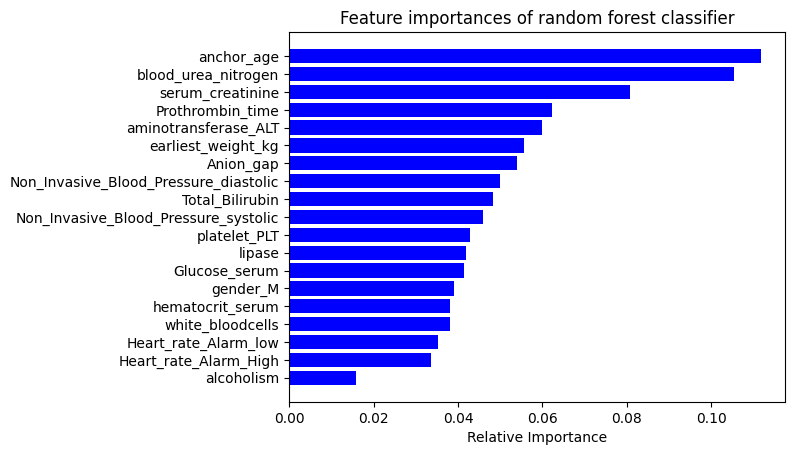

In [49]:
features = X.columns
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature importances of random forest classifier')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


# XGBoost

In [52]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Step 1: Define the XGBoost model and the hyperparameter grid
xgb_model = xgb.XGBClassifier()
xgb_param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting rounds (trees)
    'max_depth': [3, 4, 5, 6],  # Maximum tree depth
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage for boosting
    'subsample': [0.8, 0.9, 1.0],  # Fraction of samples used for fitting the trees
    'colsample_bytree': [0.8, 0.9, 1.0],  # Fraction of features used for fitting the trees
    'random_state': [RANDOM_STATE]
}

best_xgb_params = train(xgb_param_grid, xgb_model)
best_xgb_model =xgb.XGBClassifier(**best_xgb_params)
best_xgb_model.fit(X_train_resampled, y_train_resampled)

Best Hyperparameters:
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200, 'random_state': 42, 'subsample': 0.9}

Training Set Performance:
Best AUC-ROC Score:  0.8953158284708715
Best MCC Score:  0.7982662609027401
Best F1 Score:  0.8932594617864243


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [54]:
# Step 4: Use the best XGBoost model to predict the test set
test_xgb_predictions = best_xgb_model.predict(X_test)

# Step 5: Evaluate the XGBoost model on the test set
test_xgb_roc_auc = roc_auc_score(y_test, test_xgb_predictions)
test_xgb_mcc = matthews_corrcoef(y_test, test_xgb_predictions)
test_xgb_f1score = f1_score(y_test, test_xgb_predictions)

print("\nTest Set Performance:")
print(f"AUC-ROC Score: {test_xgb_roc_auc}")
print(f"MCC Score: {test_xgb_mcc}")
print(f"F1 Score: {test_xgb_f1score}")


Test Set Performance:
AUC-ROC Score: 0.6341666666666667
MCC Score: 0.28311042925246527
F1 Score: 0.39999999999999997


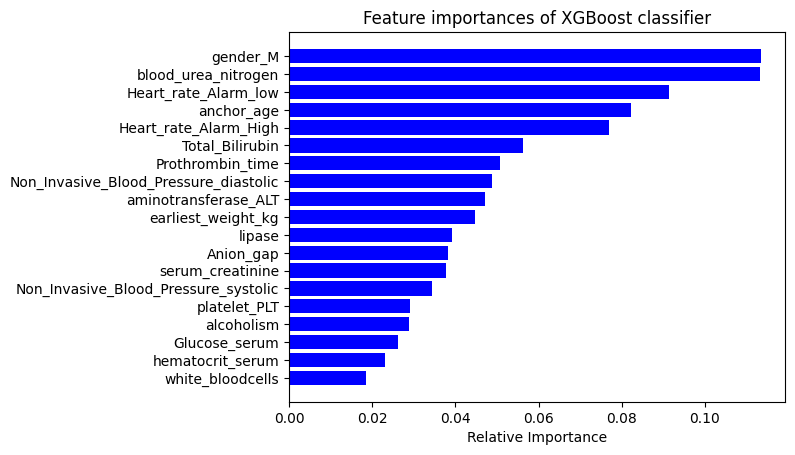

In [55]:
features = X.columns
importances = best_xgb_model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature importances of XGBoost classifier')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


# CatBoost

In [56]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import GridSearchCV

# Step 1: Define the CatBoost model and the hyperparameter grid
catboost_model = CatBoostClassifier(verbose=0)
catboost_param_grid = {
    'iterations': [50, 100, 200],  # Number of boosting rounds (trees)
    'depth': [4, 6, 8],  # Maximum tree depth
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage for boosting
    'l2_leaf_reg': [1, 3, 5],  # L2 regularization coefficient
    'random_state': [RANDOM_STATE]
}

best_catboost_params = train(catboost_param_grid, catboost_model)
best_catboost_model =CatBoostClassifier(**best_catboost_params, verbose=0)
best_catboost_model.fit(X_train_resampled, y_train_resampled)

Best Hyperparameters:
{'depth': 6, 'iterations': 200, 'l2_leaf_reg': 5, 'learning_rate': 0.1, 'random_state': 42}

Training Set Performance:
Best AUC-ROC Score:  0.9234051125312586
Best MCC Score:  0.85298133663547
Best F1 Score:  0.9247641539746804


In [57]:
# Step 4: Use the best CatBoost model to predict the test set
test_catboost_predictions = best_catboost_model.predict(X_test, prediction_type='Class')

# Step 5: Evaluate the CatBoost model on the test set
test_catboost_roc_auc = roc_auc_score(y_test, test_catboost_predictions)
test_catboost_mcc = matthews_corrcoef(y_test, test_catboost_predictions)
test_catboost_f1score = f1_score(y_test, test_catboost_predictions)

print("\nTest Set Performance:")
print(f"AUC-ROC Score: {test_catboost_roc_auc}")
print(f"MCC Score: {test_catboost_mcc}")
print(f"F1 Score: {test_catboost_f1score}")


Test Set Performance:
AUC-ROC Score: 0.5404166666666667
MCC Score: 0.09439299697958466
F1 Score: 0.2222222222222222


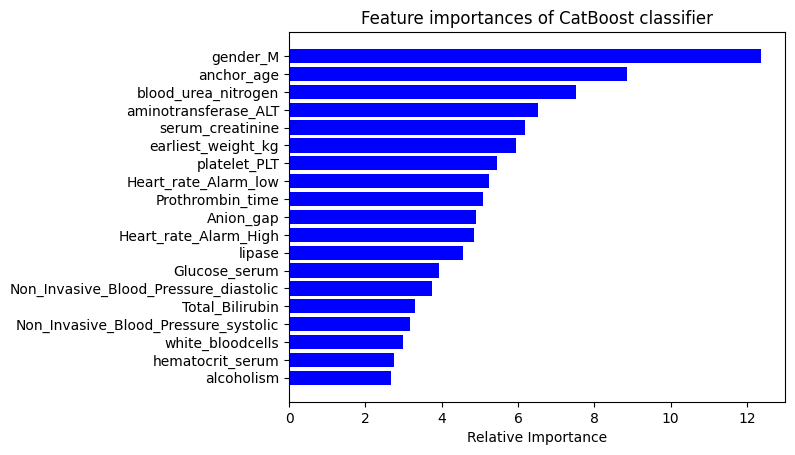

In [58]:
features = X.columns
importances = best_catboost_model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature importances of CatBoost classifier')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


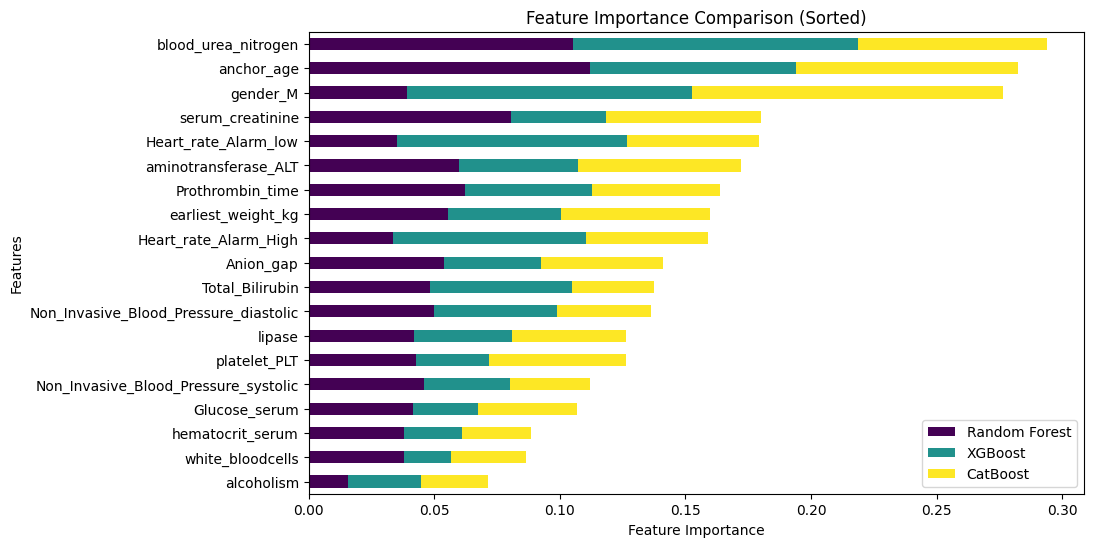

In [59]:
#Feature importance
features = X.columns
rf_importance = best_rf_model.feature_importances_ / sum(best_rf_model.feature_importances_)
xgb_importance = best_xgb_model.feature_importances_ / sum(best_xgb_model.feature_importances_)
catboost_importance = best_catboost_model.feature_importances_ / sum(best_catboost_model.feature_importances_)

# Create a DataFrame for the feature importances
data = {
    'Features': features,
    'Random Forest': rf_importance,
    'XGBoost': xgb_importance,
    'CatBoost': catboost_importance
}

df = pd.DataFrame(data)

# Set the Features column as the index
df.set_index('Features', inplace=True)

# Sort the DataFrame based on the sum of feature importances across all models
df_sorted = df.sum(axis=1).sort_values()
df_sorted = df.loc[df_sorted.index]

# Plotting the sorted stacked bar horizontal plot
ax = df_sorted.plot(kind='barh', stacked=True, figsize=(10, 6), colormap='viridis')
ax.set_xlabel('Feature Importance')
ax.set_ylabel('Features')
ax.set_title('Feature Importance Comparison (Sorted)')
plt.show()

# DNN

In [60]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import roc_auc_score, matthews_corrcoef
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

# Step 1: Define a function to create the DNN model
def create_dnn_model(optimizer='adam', batch_size=64, epochs=20):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Step 2: Define the hyperparameters to search
param_grid = {
    'batch_size': [64, 128],
    'epochs': [10, 20, 30],
    'optimizer': ['adam', 'sgd'],
}

# Step 3: Create a KerasClassifier
dnn_model = KerasClassifier(build_fn=create_dnn_model, verbose=0)

best_params = train(param_grid, dnn_model)
best_dnn_model = KerasClassifier(build_fn=
                                 create_dnn_model(optimizer=best_params['optimizer'], 
                                 batch_size=best_params['batch_size'], 
                                 epochs=best_params['epochs']), 
                                 verbose=0)

# Step 6: Train the DNN model on the training set
history = best_dnn_model.fit(X_train_resampled, y_train_resampled, epochs=best_params['epochs'], batch_size=best_params['batch_size'], validation_split=0.2, verbose=0)

/home/lunaire/Documents/College/COMP90089/COMP90089/env/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/lunaire/Documents/College/COMP90089/COMP90089/env/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/lunaire/Documents/College/COMP90089/COMP90089/env/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/lunaire/Documents/College/COMP90089/COMP90089/env/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be rename

Best Hyperparameters:
{'batch_size': 64, 'epochs': 30, 'optimizer': 'adam'}

Training Set Performance:
Best AUC-ROC Score:  0.8618403260164861
Best MCC Score:  0.7302964426622198
Best F1 Score:  0.8675426974918266


/home/lunaire/Documents/College/COMP90089/COMP90089/env/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


In [61]:
# Step 8: Test the DNN model on the test set
test_predictions = best_dnn_model.predict(X_test)
test_predictions_binary = (test_predictions > 0.5).astype(int)  # Convert to binary predictions
test_roc_auc = roc_auc_score(y_test, test_predictions_binary)
test_mcc = matthews_corrcoef(y_test, test_predictions_binary)
test_f1 = f1_score(y_test, test_predictions_binary)

print("\nTest Set Performance:")
print(f"AUC-ROC Score: {test_roc_auc}")
print(f"MCC Score: {test_mcc}")
print(f"F1 score: {test_f1}")


Test Set Performance:
AUC-ROC Score: 0.5829166666666666
MCC Score: 0.16583333333333333
F1 score: 0.3125


# Visualizations

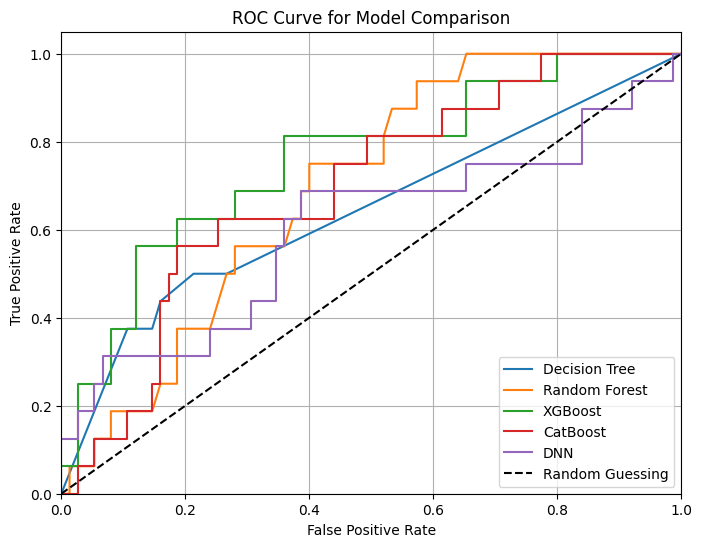

In [62]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Define the models and their names for the legend
models = [best_dt_model, best_rf_model, best_xgb_model, best_catboost_model, best_dnn_model]
model_names = ["Decision Tree", "Random Forest", "XGBoost", "CatBoost", "DNN"]

# Create a figure and axis for the ROC plot
plt.figure(figsize=(8, 6))

# Plot ROC curves for each model
for model, name in zip(models, model_names):
    y_pred = model.predict_proba(X_test)[:, 1]  # Probability of positive class

    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name}')

# Plot the random guessing line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

# Set plot properties
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Model Comparison')
plt.legend(loc='lower right')
plt.grid()

# Show the ROC plot
plt.show()


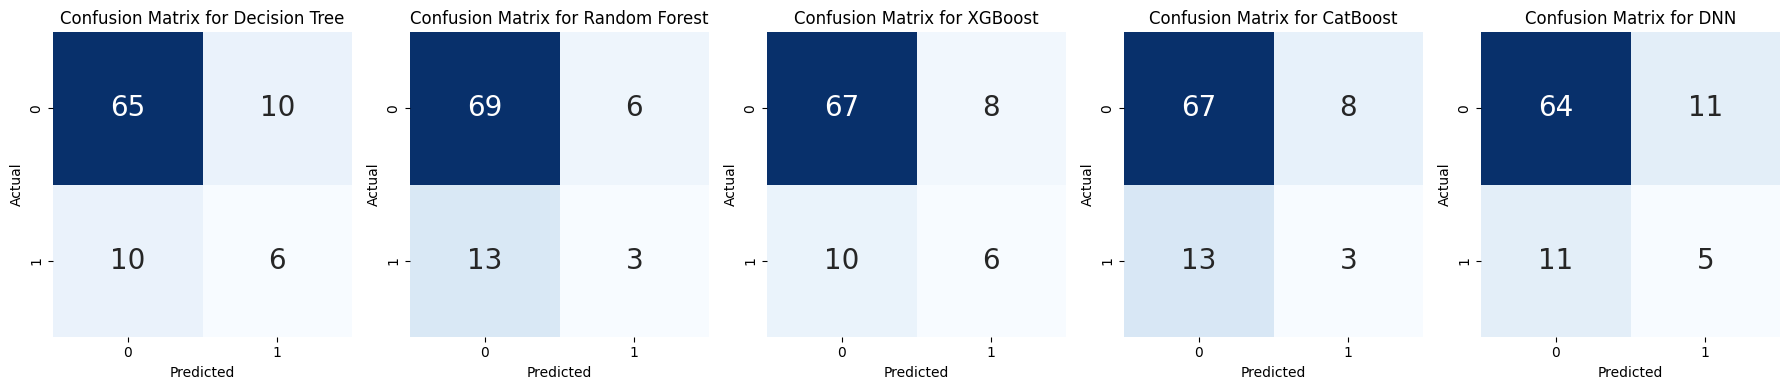

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the models and their names
models = [best_dt_model, best_rf_model, best_xgb_model, best_catboost_model, best_dnn_model]
model_names = ["Decision Tree", "Random Forest", "XGBoost", "CatBoost", "DNN"]

# Create a subplot grid to display confusion matrices for all models in a single row
num_models = len(models)
fig, axes = plt.subplots(1, num_models, figsize=(18, 4))

for model, name, ax in zip(models, model_names, axes):
    if name == "DNN":
        predictions = model.predict(X_test)
    else:
        predictions = model.predict_proba(X_test)[:, 1]  # Probability of positive class

    predictions_binary = (predictions > 0.5).astype(int)  # Convert to binary predictions
    confusion = confusion_matrix(y_test, predictions_binary)

    # Plot the confusion matrix as a heatmap
    sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax, annot_kws={"size": 20})
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    ax.set_title(f"Confusion Matrix for {name}")

plt.tight_layout()
plt.show()
